### Objective

This project requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

CUST_ID: Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

PURCHASES: Amount of purchases made from account 

ONEOFF_PURCHASES: Maximum purchase amount done in one-go

 INSTALLMENTS_PURCHASES: Amount of purchase done in installment

 CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

 ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid 

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of Credit Card for user 

PAYMENTS: Amount of Payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user
Instructions

    Load your dataset. 
    Use hierarchical clustering to identify the inherent groupings within your data.
    Plot the clusters. 
    Plot the dendrogram. Use k-means clustering. 
    Try different k values and select the best one. 
    Plot the clusters. 
    Compare the two results. 

Bonus: search for another validation metric

In [109]:
import pandas as pd

data = pd.read_csv('CC GENERAL.csv')

In [110]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [112]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [113]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [114]:
data['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [115]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [116]:
data.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [117]:
data['CREDIT_LIMIT'].mode()

0    3000.0
Name: CREDIT_LIMIT, dtype: float64

In [118]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace = True)

In [119]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [120]:
data.duplicated().sum()

0

In [121]:
data_ = data.drop(['CUST_ID'], axis = 'columns')

In [122]:
data_.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [123]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score as ss

#findind the number of Agglomerative clusters
# Agg_score = []

# for i in range(2,15):
#     model = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage ='ward')
#     pre = model.fit_predict(data_)
#     Agg_score = ss(data_, pre)
#     print(i, 'score is : ', Agg_score)
    

model = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
pre = model.fit_predict(data_)




In [124]:
data_['CLUSTER'] = pre

data_.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [125]:
DF1 = data_[data_.CLUSTER ==0]
DF2 = data_[data_.CLUSTER ==1]
DF3 = data_[data_.CLUSTER ==2]
DF4 = data_[data_.CLUSTER ==3]
DF5 = data_[data_.CLUSTER ==4]
DF6 = data_[data_.CLUSTER ==5]
print(DF1['CLUSTER'].value_counts())
print(DF4['CLUSTER'].value_counts())

0    2974
Name: CLUSTER, dtype: int64
3    5400
Name: CLUSTER, dtype: int64


Text(0.5, 1.0, 'AGGLOMERATIVE CLUSTER COUNTS')

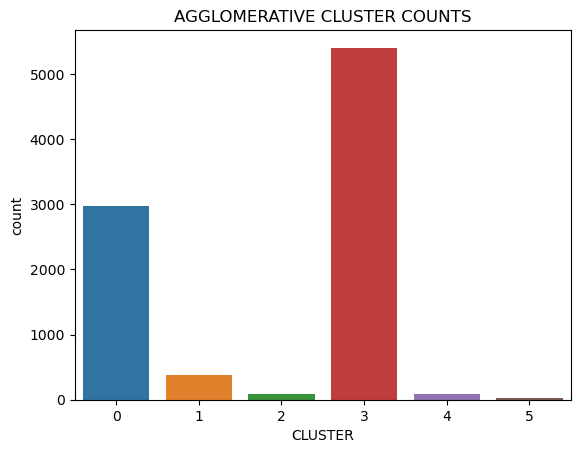

In [126]:
#Visualizing the dataset clusters

import seaborn as sb

sb.countplot(x = 'CLUSTER', data = data_)
plt.title('AGGLOMERATIVE CLUSTER COUNTS')

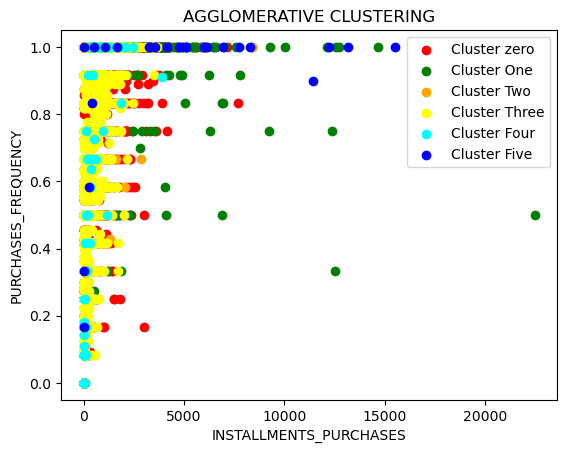

In [127]:
#Plotting the Clusters

from matplotlib import pyplot as plt

plt.scatter(DF1.INSTALLMENTS_PURCHASES, DF1.PURCHASES_FREQUENCY, c = 'red', label = 'Cluster zero')
plt.scatter(DF2['INSTALLMENTS_PURCHASES'], DF2['PURCHASES_FREQUENCY'], c = 'green', label = 'Cluster One')
plt.scatter(DF3['INSTALLMENTS_PURCHASES'], DF3['PURCHASES_FREQUENCY'], c = 'orange', label = 'Cluster Two')
plt.scatter(DF4['INSTALLMENTS_PURCHASES'], DF4['PURCHASES_FREQUENCY'], c = 'yellow', label = 'Cluster Three')
plt.scatter(DF5['INSTALLMENTS_PURCHASES'], DF5['PURCHASES_FREQUENCY'], c = 'cyan', label = 'Cluster Four')
plt.scatter(DF6['INSTALLMENTS_PURCHASES'], DF6['PURCHASES_FREQUENCY'], c = 'blue', label = 'Cluster Five')

plt.title('AGGLOMERATIVE CLUSTERING')
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')
plt.legend()
# plt.colorbar(y)

Text(0.5, 1.0, 'Customer Dandrogram')

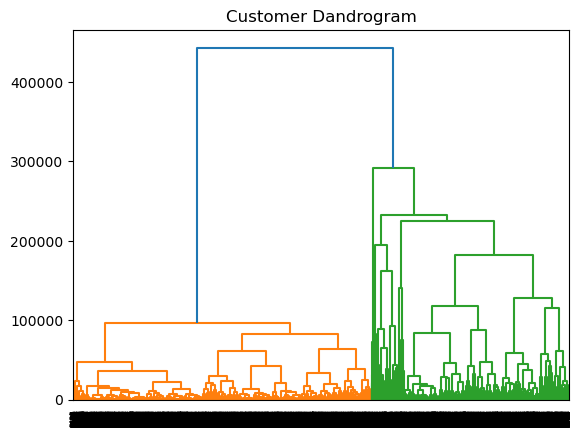

In [128]:
#Plotting the Dandrogram

import scipy.cluster.hierarchy as sch

den = sch.dendrogram(sch.linkage(data_, method = 'ward'))

plt.title('Customer Dandrogram')

In [129]:
#KMEANS 

from sklearn.cluster import KMeans


# Finding the best number of clusters which cluster with highest silhouete score
# sscore =[]
# for i in range(2,7):
#     kmeans = KMeans(n_clusters = i, random_state = 50) 
#     k_pre = kmeans.fit_predict(data_)
#     sscore = ss(data_, k_pre)
#     print(i, 'score is : ', sscore)

kmeans = KMeans(n_clusters = 2, random_state = 50)
k_pre = kmeans.fit_predict(data_)
sscore = ss(data_, k_pre)
print(sscore)




centroids = kmeans.cluster_centers_


0.5116392594411164


True     7028
False    1922
Name: Clusters, dtype: int64


Text(0.5, 1.0, 'KMEANS Cluster Counts')

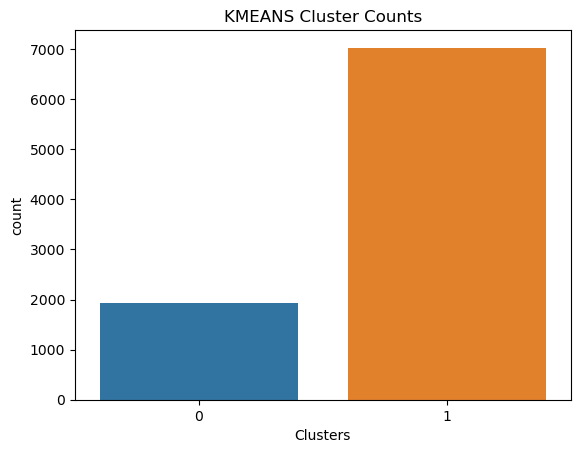

In [130]:
data_['Clusters'] = k_pre
print((data_.Clusters ==1).value_counts())

sb.countplot(x = 'Clusters', data = data_)
plt.title('KMEANS Cluster Counts')

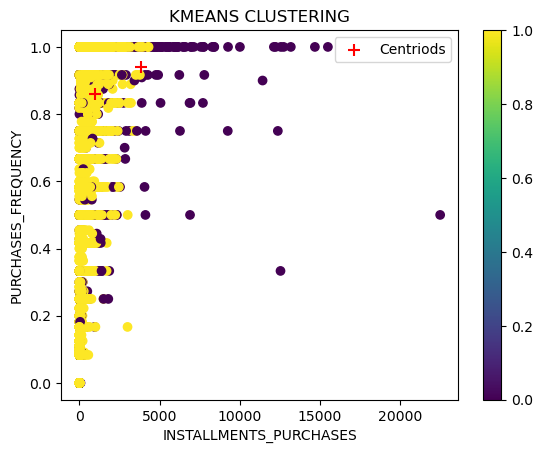

In [131]:
#KMEANS VISUALIZATION



y = plt.scatter(data_.INSTALLMENTS_PURCHASES, data_.PURCHASES_FREQUENCY, c = data_.Clusters)
plt.scatter(centroids[:,0], centroids[:,1], s = 80, c ='red', marker = '+' , label = "Centriods")

plt.title('KMEANS CLUSTERING')
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')
plt.legend()
plt.colorbar(y)

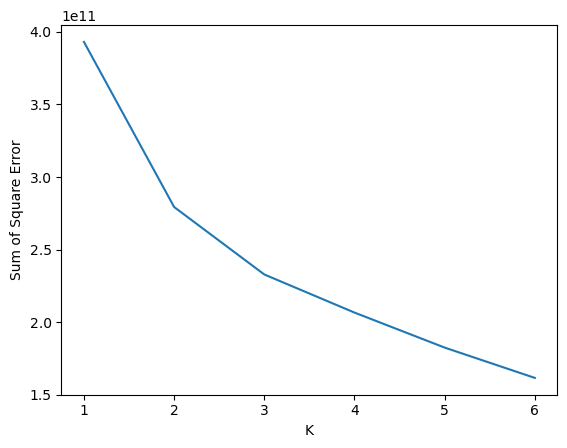

In [132]:


#Elbow Plot method to find the best number of clusters

k_range = range(1,7)
sse = []# This is the sum of square error
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(data_)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range, sse)



In [133]:
print(data_[data_.Clusters ==0].head(10))
print(data_[data_.Clusters ==1].head(10))

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1    3202.467416           0.909091       0.00              0.00   
6     627.260806           1.000000    7091.01           6402.63   
9     152.225975           0.545455    1281.60           1281.60   
15   6886.213231           1.000000    1611.70              0.00   
18   1989.072228           1.000000     504.35            166.00   
21   6369.531318           1.000000    6359.95           5910.04   
23   3800.151377           0.818182    4248.35           3454.56   
28   7152.864372           1.000000     387.05            204.55   
30  12136.219960           1.000000    3038.01           1013.20   
32   6732.823064           1.000000     324.95            324.95   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                     0.00   6442.945483             0.000000   
6                   688.38      0.000000             1.000000   
9                     0.00      0.000000             0.1

## Summary Graph

### 
1. Agglomerative claustering produced the maximum silhouette score of 39% with 6 clusters
2. For the Agglomerative clustering, 60% of the total customers falls under cluster 3 and 33% falls under cluster 0 while the rest of the clusters shared the remaining.
3. The Kmeans claustering produces the maximum silhouette score of 51% with 2 clusters
4. The eblow graph for kmeans also first appeared at cluster 2
5. In the Kmeans clustering, 78% of the total customers falls under cluster 1 while the remaining percentage falls on the clauster 0
6. The Kmeans claustering performed better than the Agglomerative clustering




